# Transformer implementation from scratch using PyTorch

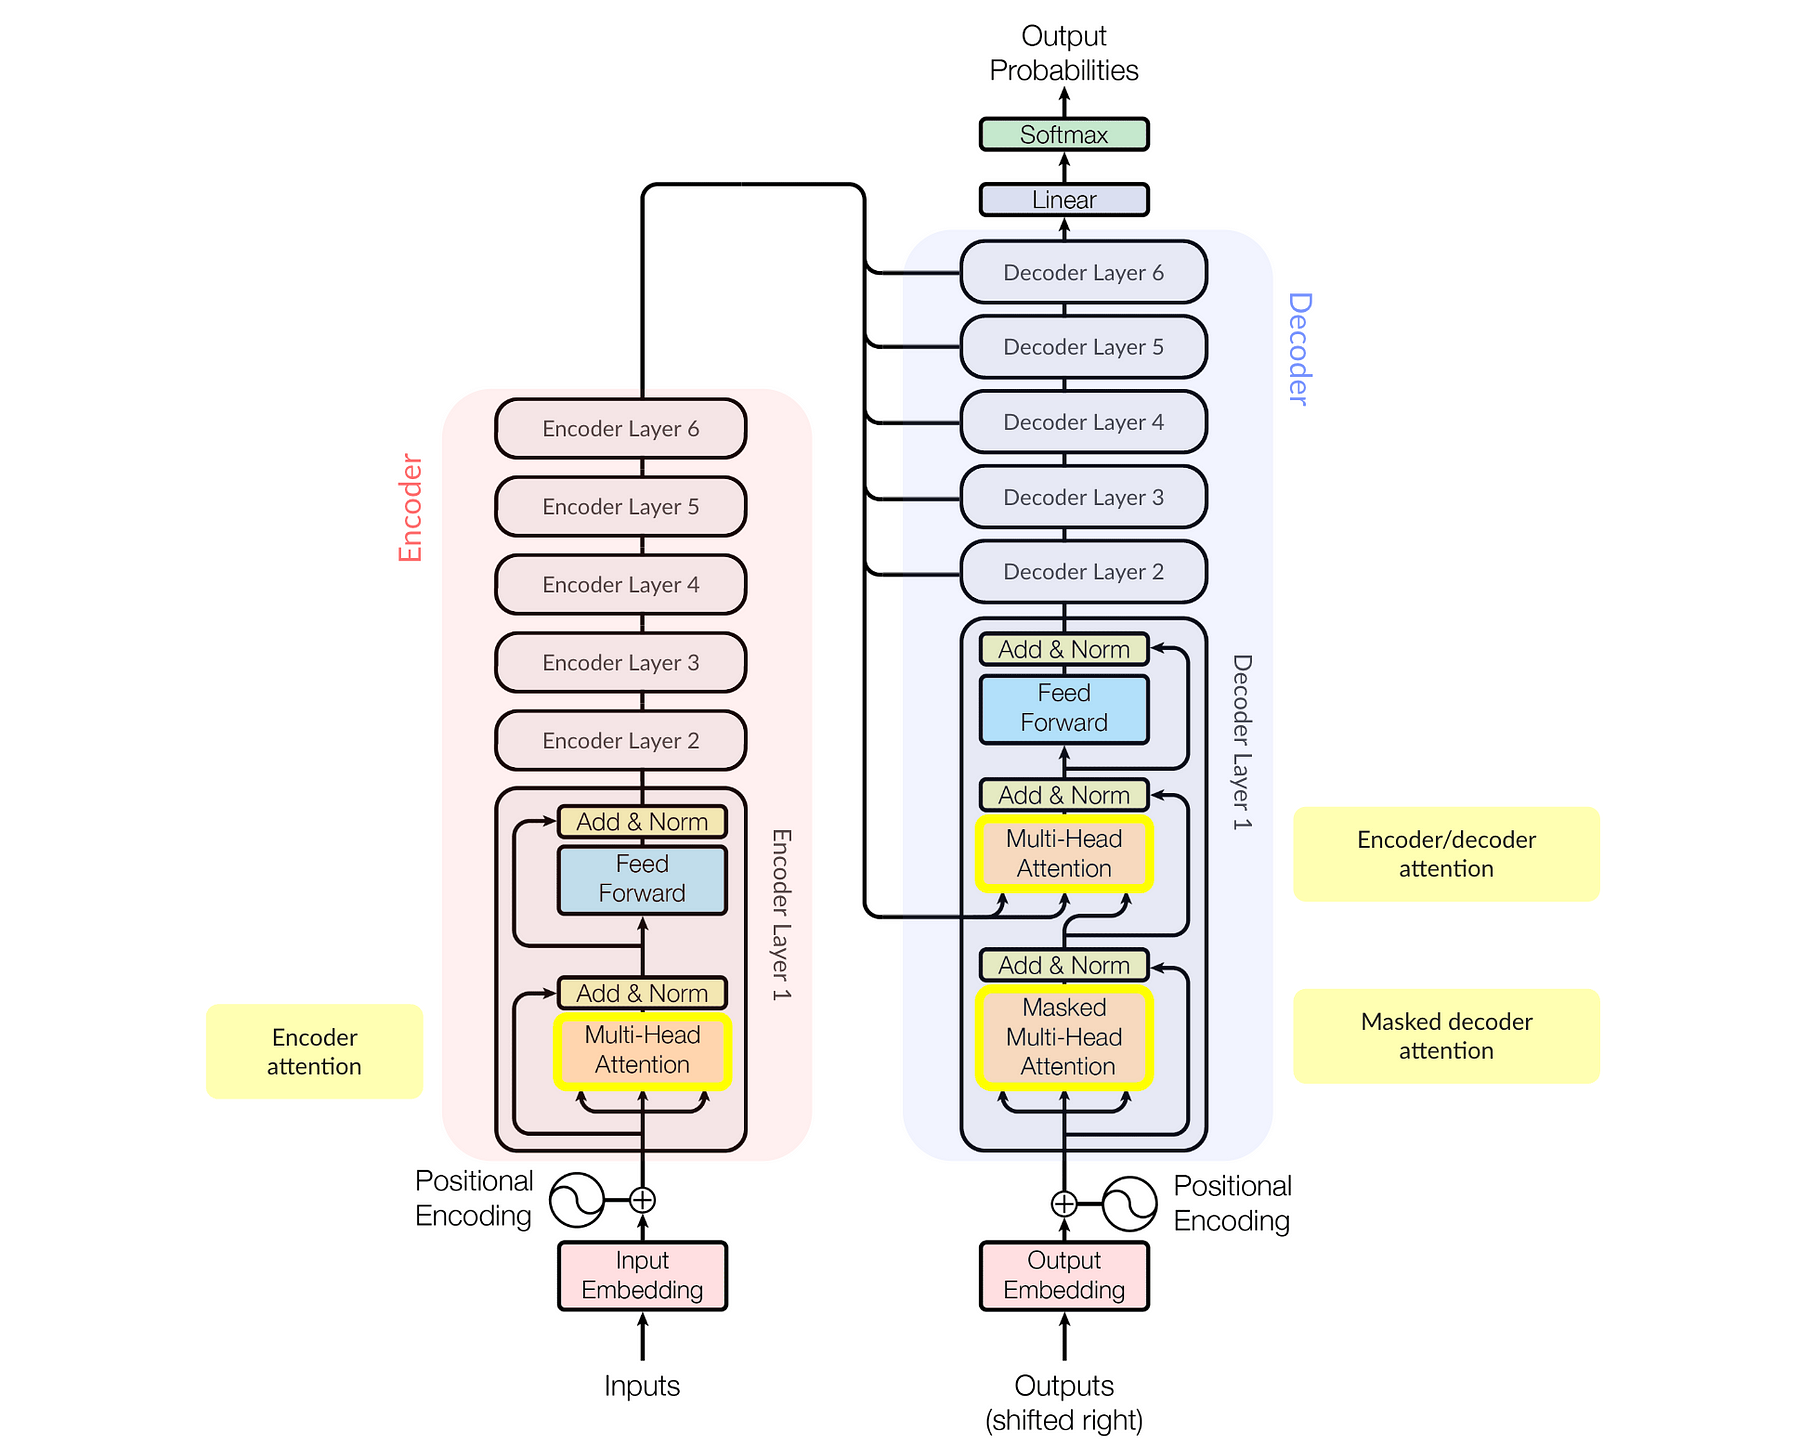

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Matrix basics with PyTorch

In [ ]:
# torch.tensor() has type torch.int64
print(torch.tensor([[[1,2,3], [3,4,5]]]))

# torch.Tensor() has type torch.float32
print(torch.Tensor([[[1,2,3], [3,4,5]]]))

# torch.IntTensor() has type torch.int32
print(torch.IntTensor([[[1,2,3], [3,4,5]]]))

# torch.tensor() can be forced to have different type, e.g. torch.float32
print(torch.tensor([[[1,2,3], [3,4,5]]], dtype=torch.float32))

tensor([[[1, 2, 3],
         [3, 4, 5]]])
tensor([[[1., 2., 3.],
         [3., 4., 5.]]])
tensor([[[1, 2, 3],
         [3, 4, 5]]], dtype=torch.int32)
tensor([[[1., 2., 3.],
         [3., 4., 5.]]])


In [ ]:
# Matrix multiplication

A = torch.tensor([[[1,2,3], [3,4,5]]])
print(f"Matrix A: \n{A}")
print(f"Size of matrix A: {A.size()}\n")

B = torch.tensor([[[1,2], [3,4], [4, 5]]])
print(f"Matrix B: \n{B}")
print(f"Size of matrix B: {B.size()}\n")

print(f"Matrix multiplication: \n{torch.matmul(A,B)}")

Matrix A: 
tensor([[[1, 2, 3],
         [3, 4, 5]]])
Size of matrix A: torch.Size([1, 2, 3])

Matrix B: 
tensor([[[1, 2],
         [3, 4],
         [4, 5]]])
Size of matrix B: torch.Size([1, 3, 2])

Matrix multiplication: 
tensor([[[19, 25],
         [35, 47]]])


In [ ]:
# Transpose matrix

A = torch.rand(1, 4, 8)
print(f"Original matrix A: \n{A}")

A = A.transpose(1,2)
print(f"Transposed matrix A: \n{A}")

Original matrix A: 
tensor([[[0.3243, 0.8374, 0.4727, 0.5031, 0.9098, 0.9627, 0.0801, 0.6658],
         [0.9209, 0.2973, 0.6347, 0.1612, 0.9589, 0.8879, 0.1335, 0.7338],
         [0.1296, 0.2361, 0.6139, 0.2943, 0.0774, 0.0776, 0.9493, 0.3559],
         [0.4670, 0.6582, 0.8039, 0.7059, 0.7350, 0.2305, 0.7733, 0.2713]]])
Transposed matrix A: 
tensor([[[0.3243, 0.9209, 0.1296, 0.4670],
         [0.8374, 0.2973, 0.2361, 0.6582],
         [0.4727, 0.6347, 0.6139, 0.8039],
         [0.5031, 0.1612, 0.2943, 0.7059],
         [0.9098, 0.9589, 0.0774, 0.7350],
         [0.9627, 0.8879, 0.0776, 0.2305],
         [0.0801, 0.1335, 0.9493, 0.7733],
         [0.6658, 0.7338, 0.3559, 0.2713]]])


In [ ]:
# Masking a matrix

A = torch.rand(1, 8, 8)
print(f"Original matrix A: \n{A}\n")

# Apply a mask to prevent attending to future positions
mask = torch.triu(torch.ones_like(A), diagonal=1)
print(f"Mask matrix: \n{mask}\n")

masked_A = A.masked_fill(mask == 1, float('-inf'))
print(f"Masked matrix A: \n{masked_A}\n")

Original matrix A: 
tensor([[[0.2690, 0.2443, 0.8863, 0.6014, 0.9206, 0.4244, 0.3763, 0.0589],
         [0.9289, 0.0930, 0.4645, 0.5099, 0.6596, 0.3787, 0.6062, 0.2162],
         [0.9220, 0.5900, 0.3197, 0.5098, 0.8085, 0.7519, 0.4998, 0.2204],
         [0.3446, 0.9127, 0.8496, 0.6827, 0.9369, 0.3711, 0.0767, 0.5201],
         [0.5098, 0.7619, 0.9631, 0.6053, 0.5830, 0.2460, 0.5494, 0.7003],
         [0.5261, 0.6772, 0.7098, 0.3315, 0.7657, 0.6921, 0.8105, 0.5333],
         [0.1105, 0.8428, 0.6619, 0.2209, 0.9473, 0.1185, 0.7771, 0.2293],
         [0.7675, 0.8342, 0.4826, 0.0350, 0.3600, 0.0227, 0.8604, 0.3529]]])

Mask matrix: 
tensor([[[0., 1., 1., 1., 1., 1., 1., 1.],
         [0., 0., 1., 1., 1., 1., 1., 1.],
         [0., 0., 0., 1., 1., 1., 1., 1.],
         [0., 0., 0., 0., 1., 1., 1., 1.],
         [0., 0., 0., 0., 0., 1., 1., 1.],
         [0., 0., 0., 0., 0., 0., 1., 1.],
         [0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 0., 0., 0.]]])

Masked matrix A:

# Self-Attention (scaled dot-product attention)

In [35]:
class SelfAttention(nn.Module):
    def __init__(self, masked: bool = False):
        super(SelfAttention, self).__init__()
        self.masked = masked

    def forward(self, Q: torch.tensor, K: torch.tensor, V: torch.tensor) -> torch.tensor:
        d_k = K.size(-1)
        scores = torch.matmul(Q, K.transpose(1, 2)) / (d_k ** 0.5)

        if self.masked:
            print(f"Unmasked scores: \n{scores}\n")
            mask = torch.triu(torch.ones_like(scores), diagonal=1)
            scores = scores.masked_fill(mask == 1, float('-inf'))
            print(f"Mask for scores: \n{mask}\n")
            print(f"Masked attention scores: \n{scores}\n")

        norm_scores = F.softmax(scores, -1)
        print(f"Normalized attention scores: \n{norm_scores}\n")

        attention = torch.matmul(norm_scores, V)
        return attention

Usage example

In [ ]:
batch_size = 1  # number of sequences
seq_length = 4  # n_elements of the sequence
embed_size = 7  # dimension of the vectors representing the elements

# Generate a random sequence of 4 elements, each one represented by a 7-dim vector
sequence_in_matrix_form = torch.rand(batch_size, seq_length, embed_size)
print(f"Representation of the sequence: \n{sequence_in_matrix_form}\n")

# Arrange the sequence in query Q, key K, and value V matrices
Q = K = V = sequence_in_matrix_form

# Self Attention
self_attention = SelfAttention()
attention = self_attention(Q, K, V)
print(f"More contextualized representations (attention): \n{attention}")

Representation of the sequence: 
tensor([[[0.9825, 0.2555, 0.2238, 0.1468, 0.5624, 0.7028, 0.1377],
         [0.3278, 0.5121, 0.9508, 0.1400, 0.8237, 0.1812, 0.6046],
         [0.7061, 0.2739, 0.3204, 0.6168, 0.8592, 0.9566, 0.4810],
         [0.4378, 0.1718, 0.8191, 0.4867, 0.3966, 0.6232, 0.1440]]])

Normalized attention scores: 
tensor([[[0.2694, 0.2171, 0.2923, 0.2212],
         [0.2081, 0.3049, 0.2586, 0.2283],
         [0.2386, 0.2201, 0.3220, 0.2193],
         [0.2270, 0.2444, 0.2758, 0.2529]]])

More contextualized representations (attention): 
tensor([[[0.6391, 0.2981, 0.5416, 0.3579, 0.6692, 0.6462, 0.3408],
         [0.5870, 0.3194, 0.6064, 0.3439, 0.6810, 0.5912, 0.3703],
         [0.6299, 0.2996, 0.5455, 0.3712, 0.6791, 0.6523, 0.3524],
         [0.6086, 0.3021, 0.5787, 0.3607, 0.6662, 0.6252, 0.3481]]])


In [ ]:
# Masked Self Attention
self_attention = SelfAttention(masked=True)
attention = self_attention(Q, K, V)
print(f"More contextualized representations (attention): \n{attention}")

Unmasked scores: 
tensor([[[0.7300, 0.5141, 0.8118, 0.5328],
         [0.5141, 0.8959, 0.7312, 0.6067],
         [0.8118, 0.7312, 1.1118, 0.7276],
         [0.5328, 0.6067, 0.7276, 0.6409]]])

Mask for scores: 
tensor([[[0., 1., 1., 1.],
         [0., 0., 1., 1.],
         [0., 0., 0., 1.],
         [0., 0., 0., 0.]]])

Masked attention scores: 
tensor([[[0.7300,   -inf,   -inf,   -inf],
         [0.5141, 0.8959,   -inf,   -inf],
         [0.8118, 0.7312, 1.1118,   -inf],
         [0.5328, 0.6067, 0.7276, 0.6409]]])

Normalized attention scores: 
tensor([[[1.0000, 0.0000, 0.0000, 0.0000],
         [0.4057, 0.5943, 0.0000, 0.0000],
         [0.3056, 0.2819, 0.4125, 0.0000],
         [0.2270, 0.2444, 0.2758, 0.2529]]])

More contextualized representations (attention): 
tensor([[[0.9825, 0.2555, 0.2238, 0.1468, 0.5624, 0.7028, 0.1377],
         [0.5934, 0.4080, 0.6559, 0.1428, 0.7177, 0.3928, 0.4152],
         [0.6839, 0.3355, 0.4686, 0.3388, 0.7585, 0.6604, 0.4109],
         [0.6086, 0.3

# Multi-head Attention

In [36]:
class MultiHeadAttention(nn.Module):
    def __init__(self, n_heads: int = 6, d_model: int = 512, masked: bool = False):
        super(MultiHeadAttention, self).__init__()
        self.n_heads = n_heads
        self.d_model = d_model
        self.attention_mechanism = SelfAttention(masked=masked)

        # Linear projection for {Q, K, V}
        self.W_Q = []
        self.W_K = []
        self.W_V = []
        for i in range(self.n_heads):
            self.W_Q.append(nn.Linear(self.d_model, self.d_model))
            self.W_K.append(nn.Linear(self.d_model, self.d_model))
            self.W_V.append(nn.Linear(self.d_model, self.d_model))

        # Linear projection for the concatenated attentions
        self.W_O = nn.Linear(self.d_model * self.n_heads, self.d_model)

    def forward(self, Q: torch.tensor, K: torch.tensor, V: torch.tensor) -> torch.tensor:
        assert(Q.size(2) == self.d_model), f"Error: the embedding space is not {self.d_model}-dim"

        concatenated_attentions = torch.empty(0)

        for i in range(self.n_heads):
            proj_Q = self.W_Q[i](Q)
            proj_K = self.W_K[i](K)
            proj_V = self.W_V[i](V)

            attention = self.attention_mechanism(proj_Q, proj_K, proj_V)
            print(f"Attention at iteration {i}: \n{attention}")

            concatenated_attentions = torch.cat([concatenated_attentions, attention], dim=-1)
            print(f"Concatenated attentions size: {concatenated_attentions.size()}\n")

        return self.W_O(concatenated_attentions)

Usage example

In [37]:
batch_size = 1  # number of sequences
seq_length = 4  # n_elements of the sequence
embed_size = 7  # dimension of the vectors representing the elements

# Generate a random sequence of 4 elements, each one represented by a 4-dim vector
sequence_in_matrix_form = torch.rand(batch_size, seq_length, embed_size)
print(f"Representation of the sequence: \n{sequence_in_matrix_form}\n")

# Arrange the sequence in query Q, key K, and value V matrices
Q = K = V = sequence_in_matrix_form

# Multi-head Attention
n_heads = 3
d_model = embed_size
multihead_attention = MultiHeadAttention(n_heads=n_heads, d_model=d_model)
attention = multihead_attention(Q, K, V)
print(f"More contextualized representations (attention): \n{attention}")

Representation of the sequence: 
tensor([[[0.4934, 0.8881, 0.5881, 0.6659, 0.0852, 0.2838, 0.1665],
         [0.6483, 0.5758, 0.5317, 0.0585, 0.6418, 0.4271, 0.0570],
         [0.0656, 0.5612, 0.8960, 0.1399, 0.7679, 0.3311, 0.8805],
         [0.6576, 0.2583, 0.4120, 0.7480, 0.8904, 0.4524, 0.4922]]])

Attention at iteration 0: 
tensor([[[-0.0665, -0.2809, -0.0968, -0.6731, -0.0659,  0.7725,  0.1894],
         [-0.0634, -0.2829, -0.0942, -0.6725, -0.0639,  0.7724,  0.1868],
         [-0.0638, -0.2825, -0.0939, -0.6745, -0.0639,  0.7741,  0.1844],
         [-0.0666, -0.2807, -0.0970, -0.6718, -0.0663,  0.7713,  0.1910]]],
       grad_fn=<UnsafeViewBackward0>)
Concatenated attentions size: torch.Size([1, 4, 7])

Attention at iteration 1: 
tensor([[[-0.0615,  0.0203, -0.0381,  0.0404, -0.2420, -0.0878,  0.0348],
         [-0.0609,  0.0186, -0.0375,  0.0405, -0.2414, -0.0889,  0.0343],
         [-0.0635,  0.0179, -0.0376,  0.0410, -0.2420, -0.0848,  0.0306],
         [-0.0612,  0.0141, -0.

In [38]:
# Masked Multi-head Attention
n_heads = 3
d_model = embed_size

multihead_attention = MultiHeadAttention(n_heads=n_heads, d_model=d_model)
attention = multihead_attention(Q, K, V)
print(f"More contextualized representations (attention): \n{attention}")

Attention at iteration 0: 
tensor([[[ 0.0116, -0.0755, -0.2902,  0.1623,  0.2272, -0.6750,  0.0393],
         [ 0.0107, -0.0765, -0.2886,  0.1648,  0.2234, -0.6749,  0.0395],
         [ 0.0096, -0.0757, -0.2884,  0.1650,  0.2226, -0.6743,  0.0402],
         [ 0.0176, -0.0799, -0.2942,  0.1532,  0.2369, -0.6744,  0.0367]]],
       grad_fn=<UnsafeViewBackward0>)
Concatenated attentions size: torch.Size([1, 4, 7])

Attention at iteration 1: 
tensor([[[-0.0149,  0.1991,  0.0789, -0.0353,  0.2544, -0.3608, -0.0870],
         [-0.0151,  0.2004,  0.0761, -0.0361,  0.2524, -0.3583, -0.0869],
         [-0.0093,  0.2014,  0.0880, -0.0340,  0.2546, -0.3604, -0.0820],
         [-0.0138,  0.1997,  0.0816, -0.0350,  0.2550, -0.3616, -0.0863]]],
       grad_fn=<UnsafeViewBackward0>)
Concatenated attentions size: torch.Size([1, 4, 14])

Attention at iteration 2: 
tensor([[[-0.2554, -0.0847, -0.3362,  0.4349, -0.1398,  0.4422,  0.0313],
         [-0.2543, -0.0842, -0.3353,  0.4354, -0.1391,  0.4425,  0

# Encoder

In [ ]:
class EncoderLayer(nn.Module):
    def __init__(self, n_heads: int = 6, d_model: int = 512):
        super(EncoderLayer, self).__init__()
        self.n_heads = n_heads
        self.d_model = d_model

        # Multi-head attention sub-layer
        self.multihead_attention = MultiHeadAttention(n_heads, d_model)
        self.norm1 = nn.LayerNorm(d_model)

        # Feed-forward sub-layer
        self.feedforward_1 = nn.Linear(d_model, d_model)
        self.relu = nn.ReLU()
        self.feedforward_2 = nn.Linear(d_model, d_model)
        self.norm2 = nn.LayerNorm(d_model)

    def forward(self, X: torch.tensor) -> torch.tensor:

        # Multi-head attention sub-layer
        attention = self.multihead_attention(X, X, X)
        X = X + attention
        X = self.norm1(X)

        # Feed-forward sub-Layer
        feedforward_output = self.feedforward_1(X)
        feedforward_output = self.relu(feedforward_output)
        feedforward_output = self.feedforward_2(feedforward_output)
        X = X + feedforward_output
        X = self.norm2(X)

        return X

In [ ]:
class Encoder(nn.Module):
    def __init__(self, n_layers: int = 6, n_heads: int = 6, d_model: int = 512):
        super(Encoder, self).__init__()
        self.n_layers = n_layers
        self.n_heads = n_heads
        self.d_model = d_model
        self.encoder_layer = EncoderLayer(n_heads, d_model)

    def forward(self, X: torch.tensor) -> torch.tensor:
        for i in range(self.n_layers):
            X = self.encoder_layer(X)
            print(f"Representation at stage {i}: \n{X}\n")

        return X

Usage example

In [ ]:
batch_size = 1
seq_length = 4
embed_size = 7
sequence_in_matrix_form = torch.rand(batch_size, seq_length, embed_size)
print(f"Representation of the sequence: \n{sequence_in_matrix_form}\n")

# Encoder
n_layers = 2
n_heads = 3
d_model = embed_size
encoder = Encoder(n_layers=n_layers, n_heads=n_heads, d_model=d_model)
encoder_output = encoder(sequence_in_matrix_form)
print(f"Encoder representations: \n{encoder_output}\n\n")

Representation of the sequence: 
tensor([[[0.3730, 0.1447, 0.9125, 0.5586, 0.7675, 0.0929, 0.0384],
         [0.6887, 0.3913, 0.8399, 0.4751, 0.2218, 0.5934, 0.1503],
         [0.2194, 0.7998, 0.2934, 0.9579, 0.0916, 0.5234, 0.2790],
         [0.1715, 0.1624, 0.3647, 0.0395, 0.4536, 0.3467, 0.5838]]])

Representation at stage 0: 
tensor([[[-0.8053, -0.6211,  1.0239,  1.3540,  1.0333, -0.8404, -1.1445],
         [-0.1917, -0.7871,  1.0643,  1.6046, -0.6106,  0.3768, -1.4564],
         [-1.1909,  0.4318, -0.3702,  2.1193, -0.4493,  0.1873, -0.7280],
         [-1.8847, -1.1253,  0.1592,  0.4080,  0.7934,  0.8247,  0.8247]]],
       grad_fn=<NativeLayerNormBackward0>)

Representation at stage 1: 
tensor([[[-1.1418, -0.3174,  0.6351,  1.7221,  0.8430, -0.8848, -0.8562],
         [-0.7175, -0.5555,  0.6273,  2.1049, -0.3830,  0.0217, -1.0979],
         [-1.3255,  0.3294, -0.4436,  2.1490, -0.2360,  0.0387, -0.5119],
         [-2.0854, -0.6173, -0.2371,  0.8769,  0.5547,  0.7497,  0.7585]]],


# Decoder

In [ ]:
class DecoderLayer(nn.Module):
    def __init__(self, n_heads: int = 6, d_model: int = 512):
        super(DecoderLayer, self).__init__()
        self.n_heads = n_heads
        self.d_model = d_model

        # Masked multi-head attention sub-layer
        self.masked_multihead_attention = MultiHeadAttention(n_heads, d_model, masked=True)
        self.norm1 = nn.LayerNorm(d_model)

        # Multi-head attention sub-layer
        self.multihead_attention = MultiHeadAttention(n_heads, d_model)
        self.norm2 = nn.LayerNorm(d_model)

        # Feed-forward sub-layer
        self.feedforward_1 = nn.Linear(d_model, d_model)
        self.relu = nn.ReLU()
        self.feedforward_2 = nn.Linear(d_model, d_model)
        self.norm3 = nn.LayerNorm(d_model)

    def forward(self, X: torch.tensor, encoder_output: torch.tensor) -> torch.tensor:

        # Masked multi-head attention sub-layer
        masked_attention = self.masked_multihead_attention(X, X, X)
        X = X + masked_attention
        X = self.norm1(X)

        # Multi-head attention sub-layer with encoder output
        attention_output = self.multihead_attention(X, encoder_output, encoder_output)
        X = X + attention_output
        X = self.norm2(X)

        # Feed-forward sub-Layer
        feedforward_output = self.feedforward_1(X)
        feedforward_output = self.relu(feedforward_output)
        feedforward_output = self.feedforward_2(feedforward_output)
        X = X + feedforward_output
        X = self.norm3(X)

        return X

In [ ]:
class Decoder(nn.Module):
    def __init__(self, n_layers: int = 6, n_heads: int = 6, d_model: int = 512):
        super(Decoder, self).__init__()
        self.n_layers = n_layers
        self.n_heads = n_heads
        self.d_model = d_model
        self.decoder_layer = DecoderLayer(n_heads, d_model)

    def forward(self, X: torch.tensor, encoder_output: torch.tensor) -> torch.tensor:
        for i in range(self.n_layers):
            X = self.decoder_layer(X, encoder_output)
            print(f"Representation at stage {i}: \n{X}\n")

        return X

Usage example

In [ ]:
print(f"========================== ENCODER ========================================")
batch_size = 1
seq_length = 4
embed_size = 7
sequence_in_matrix_form = torch.rand(batch_size, seq_length, embed_size)
print(f"Representation of the sequence: \n{sequence_in_matrix_form}\n")

# Encoder
n_layers = 2
n_heads = 3
d_model = embed_size
encoder = Encoder(n_layers=n_layers, n_heads=n_heads, d_model=d_model)
encoder_output = encoder(sequence_in_matrix_form)
print(f"Encoder representations: \n{encoder_output}\n\n")


print("========================== DECODER ========================================")
batch_size_out = 1
seq_length_out = 3
embed_size_out = 7
sequence_out_in_matrix_form = torch.rand(batch_size_out, seq_length_out, embed_size_out)
print(f"Representation of the produced output sequence: \n{sequence_out_in_matrix_form}\n")

# Decoder
n_layers = 2
n_heads = 3
d_model = embed_size_out
decoder = Decoder(n_layers=n_layers, n_heads=n_heads, d_model=d_model)
decoder_output = decoder(sequence_out_in_matrix_form, encoder_output)
print(f"Decoder representations: \n{decoder_output}\n\n")

========================== ENCODER ========================================
Representation of the sequence: 
tensor([[[1.3205e-01, 1.2468e-01, 4.6000e-01, 9.1612e-01, 6.8267e-01,
          4.2798e-01, 3.0810e-01],
         [3.6590e-01, 6.3013e-01, 1.6396e-01, 5.6013e-01, 7.5068e-01,
          8.0783e-01, 3.7351e-01],
         [2.4315e-01, 7.4893e-01, 1.8604e-02, 3.1059e-01, 7.5084e-01,
          9.1079e-01, 7.0476e-02],
         [9.2374e-01, 9.0292e-01, 7.0743e-01, 4.5354e-01, 4.1089e-01,
          2.6345e-04, 7.1285e-01]]])

Representation at stage 0: 
tensor([[[-1.4474, -1.5311,  0.8135,  1.2689,  0.3959,  0.3091,  0.1912],
         [-1.5150, -0.0909, -0.5955, -0.2948,  0.0251,  2.0106,  0.4605],
         [-1.1871,  0.5481, -0.6272, -0.7874,  0.2944,  2.0292, -0.2701],
         [ 0.3509,  0.4636,  0.8730, -0.7626, -1.0199, -1.4143,  1.5093]]],
       grad_fn=<NativeLayerNormBackward0>)

Representation at stage 1: 
tensor([[[-1.4131, -1.5007,  0.8630,  0.9788,  1.0161, -0.0560,  0.112

# Positional Encoding

In [ ]:
class PositionalEncoding(nn.Module):
    def __init__(self):
        super(PositionalEncoding, self).__init__()

    def forward(self, X: torch.tensor) -> torch.tensor:
        PE = torch.ones_like(X, dtype=torch.float32)
        d_model = PE.size(-1)
        len_seq = PE.size(-2)

        for pos in range(len_seq):
            for i in range(d_model//2):
                exp_term = 2*i / d_model
                div_term = 10000 ** exp_term
                PE[:, pos, 2*i] = torch.sin(torch.tensor(pos/div_term))
                PE[:, pos, 2*i+1] = torch.cos(torch.tensor(pos/div_term))

            # Modify the last element explicitly if d_model is odd
            if d_model % 2 != 0:
                i = d_model // 2
                exp_term = 2*i / d_model
                div_term = 10000 ** exp_term
                PE[:, pos, 2*i] = torch.sin(torch.tensor(pos/div_term))

        return PE

Usage example

In [ ]:
# Positional encoding matrix
pos = PositionalEncoding()

# Matrix 1
X = torch.tensor([[[1,2,3,4,5], [6,7,8,9,10]]])
print(f"Matrix 1: \n{X}")
print(f"Positional encodings: \n{pos(X)}")
print(f"Matrix 1 with positional encodings: \n{X + pos(X)}\n")

# Matrix 2
X = torch.tensor([[[1,2,3], [4,5,6], [7,8,9]]])
print(f"Matrix 2: \n{X}")
print(f"Positional encodings: \n{pos(X)}")
print(f"Matrix 2 with positional encodings: \n{X + pos(X)}\n")

pos1 = pos(X)

# Matrix 3
X = torch.tensor([[[0,0,0], [1,1,1], [2,2,2]]])
print(f"Matrix 3: \n{X}")
print(f"Positional encodings: \n{pos(X)}")
print(f"Matrix 3 with positional encodings: \n{X + pos(X)}\n")

pos2 = pos(X)

# The matrix 2 and matrix 3 have the same positional encodings, since they are based
# only on the matrix structure, not on the content
print(f"Are the positional encodings equivalent? {torch.equal(pos1, pos2)}")

Matrix 1: 
tensor([[[ 1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10]]])
Positional encodings: 
tensor([[[0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00],
         [8.4147e-01, 5.4030e-01, 2.5116e-02, 9.9968e-01, 6.3096e-04]]])
Matrix 1 with positional encodings: 
tensor([[[ 1.0000,  3.0000,  3.0000,  5.0000,  5.0000],
         [ 6.8415,  7.5403,  8.0251,  9.9997, 10.0006]]])

Matrix 2: 
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
Positional encodings: 
tensor([[[ 0.0000,  1.0000,  0.0000],
         [ 0.8415,  0.5403,  0.0022],
         [ 0.9093, -0.4161,  0.0043]]])
Matrix 2 with positional encodings: 
tensor([[[1.0000, 3.0000, 3.0000],
         [4.8415, 5.5403, 6.0022],
         [7.9093, 7.5839, 9.0043]]])

Matrix 3: 
tensor([[[0, 0, 0],
         [1, 1, 1],
         [2, 2, 2]]])
Positional encodings: 
tensor([[[ 0.0000,  1.0000,  0.0000],
         [ 0.8415,  0.5403,  0.0022],
         [ 0.9093, -0.4161,  0.0043]]])
Matrix 3 with positional encodings: 
